In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import numpy as np
import utils
import time
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# load data 
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [3]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
data = data.loc[:, data.columns.notna()]
data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [4]:
# Tìm các cột không phải là số (numeric)
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
print("Các cột không phải kiểu số:")
print(non_numeric_cols)


Các cột không phải kiểu số:
['proto_tcp', 'proto_udp']


In [5]:
#Tách cột target ra khỏi dữ liệu
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
X,_ = Preprocessing.scale_data(X)
# X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
#chưa áp dụng smotesmote
X_train_nsm, X_test_nsm, y_train_nsm, y_test_nsm = train_test_split(X,y, test_size=0.2, random_state=42)

#áp dụng smote
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm, y_train_sm = Preprocessing.apply_smote(X_train_sm, y_train_sm)

Train với dữ liệu chưa giảm chiều

LinearSVC

In [7]:
# model_LinearSVC = model.model_LinearSVC(X_train_sm, y_train_sm)
# y_pred = model_LinearSVC.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [8]:
# accuracy = accuracy_score(y_test_sm, y_pred)
# print("Accuracy:", accuracy)

# report = classification_report(y_test_sm, y_pred, output_dict=True)
# print("Precision (macro):", report["macro avg"]["precision"])
# print("Recall (macro):", report["macro avg"]["recall"])
# print("F1-score (macro):", report["macro avg"]["f1-score"])
# print("Support (macro):", report["macro avg"]["support"])

xgboost

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [23:23:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Thời gian chạy: 4.2284 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       1.00      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.97      0.98        58

    accuracy                           1.00     24624
   macro avg       0.96      0.95      0.95     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1569     0     0     0     0     0     0     0     0     0 

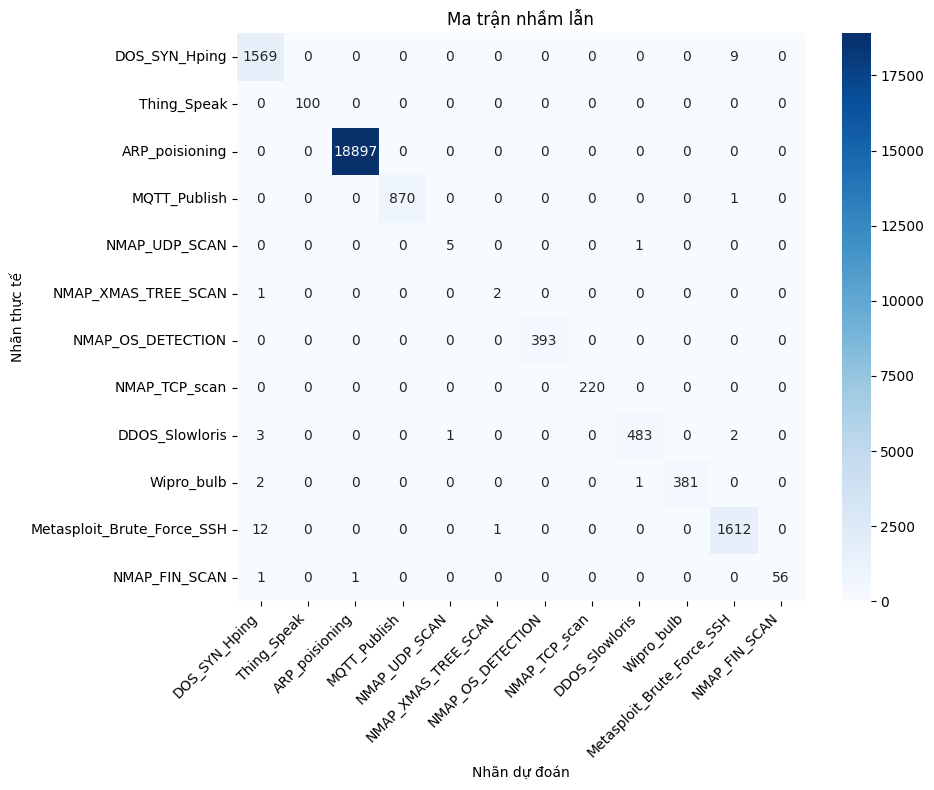

In [9]:
model_xgboost = model.model_xgboost(X_train_sm, y_train_sm,12)
y_pred = model_xgboost.predict(X_test_sm)
utils.report(y_test_sm, y_pred)
attack_labels = [
    "DOS_SYN_Hping",
    "Thing_Speak",
    "ARP_poisioning",
    "MQTT_Publish",
    "NMAP_UDP_SCAN",
    "NMAP_XMAS_TREE_SCAN",
    "NMAP_OS_DETECTION",
    "NMAP_TCP_scan",
    "DDOS_Slowloris",
    "Wipro_bulb",
    "Metasploit_Brute_Force_SSH",
    "NMAP_FIN_SCAN"
]
utils.plot_confusion_matrix(y_test_sm, y_pred,attack_labels)

In [10]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9985380116959064
Precision (macro): 0.9563724562441163
Recall (macro): 0.9525486062541711
F1-score (macro): 0.9544317946551096
Support (macro): 24624.0


logistic_regression

In [11]:
model_logistic_regression = model.model_logistic_regression(X_train_sm, y_train_sm)
y_pred = model_logistic_regression.predict(X_test_sm)
utils.report(y_test_sm, y_pred)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Thời gian chạy: 22.0736 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      1578
           1       0.73      0.99      0.84       100
           2       1.00      1.00      1.00     18897
           3       0.99      1.00      1.00       871
           4       0.09      0.83      0.16         6
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.84      0.87      0.85       489
           9       1.00      0.99      1.00       384
          10       0.94      0.94      0.94      1625
          11       0.60      0.91      0.73        58

    accuracy                           0.98     24624
   macro avg       0.79      0.92      0.83     24624
weighted avg       0.99      0.98      0.98     24624

Confusion Matrix:
 [[ 1354    11     0     5    14     1     0     0    74     0

In [12]:
accuracy = accuracy_score(y_test_sm,y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm,y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9837150747238467
Precision (macro): 0.7946906078528712
Recall (macro): 0.9215348219280372
F1-score (macro): 0.825900190908169
Support (macro): 24624.0


KNN

In [13]:
model_knn = model.model_knn(X_train_sm, y_train_sm)
y_pred = model_knn.predict(X_test_sm)
utils.report(y_test_sm, y_pred)

Thời gian chạy: 0.0390 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1578
           1       0.98      0.97      0.97       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.45      0.83      0.59         6
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.98      0.98      0.98      1625
          11       0.98      0.91      0.95        58

    accuracy                           1.00     24624
   macro avg       0.90      0.94      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1547     1     0     0     3     1     0     0     0     0 

In [14]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9965480831708902
Precision (macro): 0.896836449293073
Recall (macro): 0.943261262627022
F1-score (macro): 0.9125230234592236
Support (macro): 24624.0


random_forest

In [15]:
model_random_forest = model.model_random_forest(X_train_sm, y_train_sm)
y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_test_sm, y_pred)

Thời gian chạy: 5.6589 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.95      0.97        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     0     0     0     0     0     1     0 

In [16]:
accuracy = accuracy_score(y_test_sm,y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm,y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9979694606887589
Precision (macro): 0.9810036367122588
Recall (macro): 0.9471932368502771
F1-score (macro): 0.9612518196986694
Support (macro): 24624.0


MLP

In [17]:
model_mlp = model.model_mlp(X_train_sm, y_train_sm, input_size=X_train_sm.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=1000)
y_pred = model.predict_mlp(model_mlp, X_test_sm)
utils.report(y_test_sm,y_pred)

Đang huấn luyện trên: cuda
Epoch [1/1000], Loss: 2.4939
Epoch [10/1000], Loss: 2.3299
Epoch [20/1000], Loss: 2.0332
Epoch [30/1000], Loss: 1.6330
Epoch [40/1000], Loss: 1.2895
Epoch [50/1000], Loss: 1.0312
Epoch [60/1000], Loss: 0.8402
Epoch [70/1000], Loss: 0.7109
Epoch [80/1000], Loss: 0.5863
Epoch [90/1000], Loss: 0.4860
Epoch [100/1000], Loss: 0.4347
Epoch [110/1000], Loss: 0.3841
Epoch [120/1000], Loss: 0.3560
Epoch [130/1000], Loss: 0.3332
Epoch [140/1000], Loss: 0.3047
Epoch [150/1000], Loss: 0.2949
Epoch [160/1000], Loss: 0.2833
Epoch [170/1000], Loss: 0.2737
Epoch [180/1000], Loss: 0.2582
Epoch [190/1000], Loss: 0.2505
Epoch [200/1000], Loss: 0.2375
Epoch [210/1000], Loss: 0.2269
Epoch [220/1000], Loss: 0.2245
Epoch [230/1000], Loss: 0.2208
Epoch [240/1000], Loss: 0.2148
Epoch [250/1000], Loss: 0.2063
Epoch [260/1000], Loss: 0.2027
Epoch [270/1000], Loss: 0.1967
Epoch [280/1000], Loss: 0.1958
Epoch [290/1000], Loss: 0.1877
Epoch [300/1000], Loss: 0.1778
Epoch [310/1000], Loss:

In [18]:
accuracy = accuracy_score(y_test_sm,y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm,y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9796946068875894
Precision (macro): 0.7743854581490003
Recall (macro): 0.9160958124739377
F1-score (macro): 0.8067535411455085
Support (macro): 24624.0


Train với dữ liệu đã giảm chiều

c:\Users\QUIN\Desktop\PPNCKH\DataProcessing.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


40


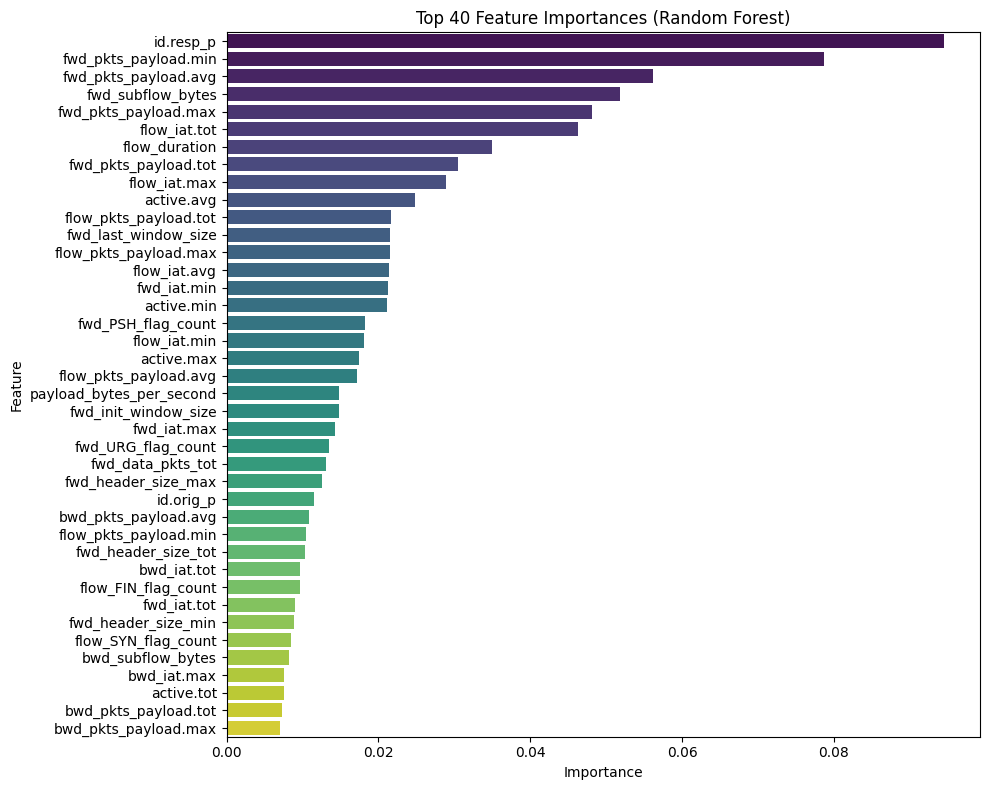

In [19]:
# Xử lý dữ liệu
list = DataProcessing.select_feature(X_train_sm, y_train_sm)
print(len(list))

In [20]:
X_train_sm = X_train_sm[list['Feature']]
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train_sm[list['Feature']], threshold=0.8)

Các cột bị loại bỏ: ['bwd_subflow_bytes', 'flow_pkts_payload.max', 'fwd_data_pkts_tot', 'bwd_pkts_payload.avg', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_header_size_min', 'fwd_pkts_payload.avg', 'active.max', 'fwd_header_size_max', 'flow_iat.avg', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.max', 'active.min', 'flow_SYN_flag_count', 'flow_duration']


In [21]:
X_train_sm_dr = df_reduced
X_test_sm_dr = X_test_sm[list['Feature']].drop(dropped_columns, axis=1)
y_train_sm_dr = y_train_sm.copy()
y_test_sm_dr = y_test_sm.copy()

LinearSVC

In [22]:
model_LinearSVC_dr = model.model_LinearSVC(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_LinearSVC_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr,y_pred_dr)

Thời gian chạy: 129.0657 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.77      0.67      1578
           1       0.64      0.63      0.63       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.07      0.83      0.13         6
           5       0.33      0.67      0.44         3
           6       0.86      0.91      0.88       393
           7       0.92      1.00      0.96       220
           8       0.64      0.79      0.71       489
           9       1.00      0.99      0.99       384
          10       0.86      0.47      0.61      1625
          11       0.40      0.66      0.49        58

    accuracy                           0.94     24624
   macro avg       0.69      0.81      0.71     24624
weighted avg       0.95      0.94      0.94     24624

Confusion Matrix:
 [[ 1211    29     0     0    52     1     2    18   162     

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9418453541260559
Precision (macro): 0.6917494139619568
Recall (macro): 0.8093432313386817
F1-score (macro): 0.7096600336052172
Support (macro): 24624.0


xgboost

In [24]:
model_xgboost_dr = model.model_xgboost(X_train_sm_dr, y_train_sm_dr,12)
y_pred_dr = model_xgboost_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr,y_pred_dr)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [23:26:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Thời gian chạy: 1.8472 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       0.99      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       0.98      0.98      0.98        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1567     1     0     0     0     0     0     0     2     0 

In [25]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9983755685510072
Precision (macro): 0.9814925159244283
Recall (macro): 0.9537259227826086
F1-score (macro): 0.9648267195180922
Support (macro): 24624.0


logistic_regression

In [26]:
model_logistic_regression_dr = model.model_logistic_regression(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_logistic_regression_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr,y_pred_dr)

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Thời gian chạy: 11.3117 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1578
           1       0.62      0.97      0.76       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.09      0.83      0.16         6
           5       0.25      0.67      0.36         3
           6       0.89      1.00      0.94       393
           7       0.92      1.00      0.96       220
           8       0.72      0.79      0.75       489
           9       1.00      0.99      1.00       384
          10       0.96      0.89      0.92      1625
          11       0.45      0.74      0.56        58

    accuracy                           0.97     24624
   macro avg       0.73      0.89      0.77     24624
weighted avg       0.98      0.97      0.98     24624

Confusion Matrix:
 [[ 1254    31     0     1    39     2     2    18   136     0

In [27]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9746588693957114
Precision (macro): 0.7312530824041729
Recall (macro): 0.889761734599302
F1-score (macro): 0.7707405676064379
Support (macro): 24624.0


knn

In [28]:
model_knn_dr = model.model_knn(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_knn_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr, y_pred_dr)

Thời gian chạy: 0.0153 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1578
           1       0.98      0.98      0.98       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.36      0.83      0.50         6
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00       393
           7       0.99      1.00      0.99       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.98      1625
          11       0.91      0.90      0.90        58

    accuracy                           1.00     24624
   macro avg       0.89      0.94      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1552     1     0     0     6     0     0     1     0     0 

In [29]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9964668615984406
Precision (macro): 0.8906230560688978
Recall (macro): 0.9420302260105394
F1-score (macro): 0.907385084226514
Support (macro): 24624.0


random_forest

In [30]:
model_random_forest_dr = model.model_random_forest(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_random_forest_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr, y_pred_dr)

Thời gian chạy: 3.7560 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       0.99      0.98      0.98       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       1.00      0.99      0.99      1625
          11       0.96      0.95      0.96        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1569     0     0     0     0     0     0     1     2     0 

In [31]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9980100714749838
Precision (macro): 0.978924118201916
Recall (macro): 0.9489323374654886
F1-score (macro): 0.9611350282757821
Support (macro): 24624.0


MLP

In [32]:
model_mlp_dr = model.model_mlp(X_train_sm_dr, y_train_sm_dr, input_size=X_train_sm_dr.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=10000)

Đang huấn luyện trên: cuda
Epoch [1/10000], Loss: 2.4993
Epoch [10/10000], Loss: 2.3502
Epoch [20/10000], Loss: 2.1039
Epoch [30/10000], Loss: 1.8302
Epoch [40/10000], Loss: 1.5811
Epoch [50/10000], Loss: 1.3657
Epoch [60/10000], Loss: 1.1990
Epoch [70/10000], Loss: 1.0785
Epoch [80/10000], Loss: 0.9708
Epoch [90/10000], Loss: 0.8789
Epoch [100/10000], Loss: 0.7968
Epoch [110/10000], Loss: 0.7177
Epoch [120/10000], Loss: 0.6590
Epoch [130/10000], Loss: 0.6219
Epoch [140/10000], Loss: 0.5829
Epoch [150/10000], Loss: 0.5518
Epoch [160/10000], Loss: 0.5346
Epoch [170/10000], Loss: 0.5043
Epoch [180/10000], Loss: 0.4909
Epoch [190/10000], Loss: 0.4744
Epoch [200/10000], Loss: 0.4614
Epoch [210/10000], Loss: 0.4487
Epoch [220/10000], Loss: 0.4356
Epoch [230/10000], Loss: 0.4198
Epoch [240/10000], Loss: 0.4061
Epoch [250/10000], Loss: 0.4046
Epoch [260/10000], Loss: 0.3981
Epoch [270/10000], Loss: 0.3813
Epoch [280/10000], Loss: 0.3835
Epoch [290/10000], Loss: 0.3659
Epoch [300/10000], Loss:

In [33]:
y_pred_dr = model.predict_mlp(model_mlp_dr, X_test_sm_dr)
utils.report(y_test_sm, y_pred_dr)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      1578
           1       0.60      0.99      0.75       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.10      0.83      0.17         6
           5       0.11      0.67      0.18         3
           6       0.93      1.00      0.96       393
           7       0.91      1.00      0.95       220
           8       0.99      0.84      0.91       489
           9       1.00      0.99      1.00       384
          10       0.96      0.92      0.94      1625
          11       0.55      0.84      0.67        58

    accuracy                           0.98     24624
   macro avg       0.75      0.91      0.79     24624
weighted avg       0.99      0.98      0.98     24624

Confusion Matrix:
 [[ 1379    39     6     1    35     6     5    18     4     0    61    24]
 [    0    99  

In [34]:
accuracy = accuracy_score(y_test_sm, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9825779727095516
Precision (macro): 0.7545804697926791
Recall (macro): 0.913121112987637
F1-score (macro): 0.7851550347091097
Support (macro): 24624.0


Train mô hỉnh tinh chỉnh.

In [35]:

# y_pred = model_random_forest.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

Random Forest

In [ ]:
#test
# Không gian tham số
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10)
}

# Khởi tạo mô hình
get_random_forest_model_instance = model.get_random_forest_model() 
# Tìm kiếm ngẫu nhiên
random_search = RandomizedSearchCV(
    estimator=get_random_forest_model_instance,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro'
)

# Huấn luyện
start_time = time.time()
random_search.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')
# In tham số tốt nhất
print("Best params:", random_search.best_params_)
# Dự đoán và đánh giá
y_pred_rd = random_search.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_test_sm_dr,y_pred_rd)  

In [ ]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_rd)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_rd, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

XGBoost

In [ ]:
# Không gian tham số
# Tính scale_pos_weight
class_counts = np.bincount(y_train_sm_dr)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, class_counts.max() / class_counts.min()]  # Xử lý mất cân bằng
}

# Khởi tạo mô hình
xgb_model = model.get_xgboost_model(random_state=42)

# Tìm kiếm ngẫu nhiên
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Số lần thử ngẫu nhiên
    cv=5,       # Cross-validation với 5 fold
    scoring='f1_macro',  # Dùng f1_macro để đánh giá tốt hơn với dữ liệu mất cân bằng
    random_state=42,
    n_jobs=-1    # Sử dụng tất cả CPU
)

# Huấn luyện
start_time = time.time()
random_search_xgb.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')
# Lấy mô hình tốt nhất
best_xgb_model = random_search_xgb.best_estimator_
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

# Dự đoán và đánh giá
y_pred_xgb = best_xgb_model.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_test_sm_dr,y_pred_xgb)  

In [ ]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_xgb)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_xgb, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Logistic Regression

In [ ]:
# # Định nghĩa không gian tham số cho Logistic Regression
# param_dist_lr = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'max_iter': [100, 500, 1000],
#     'solver': ['lbfgs', 'saga'],
#     'class_weight': ['balanced', None]  # Xử lý mất cân bằng
# }

# # Khởi tạo mô hình
# lr_model = model.get_logistic_regression_model(random_state=42)

# # Tìm kiếm ngẫu nhiên
# random_search_lr = RandomizedSearchCV(
#     estimator=lr_model,
#     param_distributions=param_dist_lr,
#     n_iter=10,
#     cv=5,
#     scoring='f1_macro',  # Phù hợp với dữ liệu mất cân bằng
#     random_state=42,
#     n_jobs=-1
# )

# # Huấn luyện
# random_search_lr.fit(X_train_sm_dr, y_train_sm_dr)

# # Lấy mô hình tốt nhất
# best_lr_model = random_search_lr.best_estimator_
# print("Best parameters for Logistic Regression:", random_search_lr.best_params_)

# # Dự đoán và đánh giá
# y_pred_lr = best_lr_model.predict(X_test_sm_dr)
# print("Logistic Regression Classification Report:")
# utils.report(y_test_sm_dr, y_pred_lr)

KNN

In [ ]:
# Định nghĩa không gian tham số cho KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo mô hình
knn_model = model.get_knn_model()

# Tìm kiếm ngẫu nhiên
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=10,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Huấn luyện
start_time = time.time()
random_search_knn.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')
# Lấy mô hình tốt nhất
best_knn_model = random_search_knn.best_estimator_
print("Best parameters for KNN:", random_search_knn.best_params_)

# Dự đoán và đánh giá
y_pred_knn = best_knn_model.predict(X_test_sm_dr)
print("KNN Classification Report:")
utils.report(y_test_sm_dr, y_pred_knn)

In [ ]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_knn)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_knn, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])
